<a href="https://colab.research.google.com/github/SkinHeadDressSom/Ultimate-X-ray-AI/blob/main/CXR_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

In [7]:
nih_df = pd.read_csv('/content/drive/MyDrive/UltimateXray/NIH/bbox_nih.csv')
nih_df = nih_df.drop(columns=['Image Path'], axis=1)
nih_df

,Image Index,Finding Label,Bbox [x,y,w,h]
0,00000002_000.png,No Finding,NaN,NaN,NaN,NaN
1,00000005_000.png,No Finding,NaN,NaN,NaN,NaN
2,00000005_001.png,No Finding,NaN,NaN,NaN,NaN
3,00000005_002.png,No Finding,NaN,NaN,NaN,NaN
4,00000005_003.png,No Finding,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
61340,00030801_000.png,No Finding,NaN,NaN,NaN,NaN
61341,00030802_000.png,No Finding,NaN,NaN,NaN,NaN
61342,00030803_000.png,No Finding,NaN,NaN,NaN,NaN
61343,00030804_000.png,No Finding,NaN,NaN,NaN,NaN


In [8]:
nih_df = nih_df.rename(columns={
    'Image Index': 'image_id',
    'Finding Label': 'class_name',
    'Bbox [x': 'x_min',
    'y': 'y_min',
    'w': 'width',
    'h]': 'height'
})
nih_df['x_max'] = nih_df['x_min'] + nih_df['width']
nih_df['y_max'] = nih_df['y_min'] + nih_df['height']
nih_df = nih_df[['image_id', 'class_name', 'x_min', 'y_min', 'x_max', 'y_max']]
nih_df

,image_id,class_name,x_min,y_min,x_max,y_max
0,00000002_000.png,No Finding,NaN,NaN,NaN,NaN
1,00000005_000.png,No Finding,NaN,NaN,NaN,NaN
2,00000005_001.png,No Finding,NaN,NaN,NaN,NaN
3,00000005_002.png,No Finding,NaN,NaN,NaN,NaN
4,00000005_003.png,No Finding,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
61340,00030801_000.png,No Finding,NaN,NaN,NaN,NaN
61341,00030802_000.png,No Finding,NaN,NaN,NaN,NaN
61342,00030803_000.png,No Finding,NaN,NaN,NaN,NaN
61343,00030804_000.png,No Finding,NaN,NaN,NaN,NaN


In [9]:
nih_df['image_id'] = '/content/drive/MyDrive/UltimateXray/NIH/train/' + nih_df['image_id']
nih_df

,image_id,class_name,x_min,y_min,x_max,y_max
0,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
1,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
2,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
3,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
4,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
61340,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
61341,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
61342,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
61343,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN


In [13]:
rsna_df = pd.read_csv('/content/drive/MyDrive/UltimateXray/RSNA/rsna_train_labels.csv')
rsna_df

,patientId,x,y,width,height,Target
0,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
1,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
2,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
3,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1
4,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1
...,...,...,...,...,...,...
9550,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,316.0,504.0,179.0,273.0,1
9551,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,609.0,464.0,240.0,284.0,1
9552,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
9553,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


In [14]:
rsna_df = rsna_df.rename(columns={
    'patientId': 'image_id',
    'x': 'x_min',
    'y': 'y_min',
    'width': 'width',
    'height': 'height'
})
rsna_df['x_max'] = rsna_df['x_min'] + rsna_df['width']
rsna_df['y_max'] = rsna_df['y_min'] + rsna_df['height']
rsna_df['class_name'] = 'Pneumonia'
rsna_df = rsna_df[['image_id', 'class_name', 'x_min', 'y_min', 'x_max', 'y_max']]
rsna_df

,image_id,class_name,x_min,y_min,x_max,y_max
0,00436515-870c-4b36-a041-de91049b9ab4,Pneumonia,264.0,152.0,477.0,531.0
1,00436515-870c-4b36-a041-de91049b9ab4,Pneumonia,562.0,152.0,818.0,605.0
2,00704310-78a8-4b38-8475-49f4573b2dbb,Pneumonia,323.0,577.0,483.0,681.0
3,00704310-78a8-4b38-8475-49f4573b2dbb,Pneumonia,695.0,575.0,857.0,712.0
4,00aecb01-a116-45a2-956c-08d2fa55433f,Pneumonia,288.0,322.0,382.0,457.0
...,...,...,...,...,...,...
9550,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,Pneumonia,316.0,504.0,495.0,777.0
9551,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Pneumonia,609.0,464.0,849.0,748.0
9552,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Pneumonia,185.0,298.0,413.0,677.0
9553,c1f7889a-9ea9-4acb-b64c-b737c929599a,Pneumonia,570.0,393.0,831.0,738.0


In [15]:
rsna_df['image_id'] = '/content/drive/MyDrive/UltimateXray/RSNA/train/' + rsna_df['image_id']
rsna_df

,image_id,class_name,x_min,y_min,x_max,y_max
0,/content/drive/MyDrive/UltimateXray/RSNA/train...,Pneumonia,264.0,152.0,477.0,531.0
1,/content/drive/MyDrive/UltimateXray/RSNA/train...,Pneumonia,562.0,152.0,818.0,605.0
2,/content/drive/MyDrive/UltimateXray/RSNA/train...,Pneumonia,323.0,577.0,483.0,681.0
3,/content/drive/MyDrive/UltimateXray/RSNA/train...,Pneumonia,695.0,575.0,857.0,712.0
4,/content/drive/MyDrive/UltimateXray/RSNA/train...,Pneumonia,288.0,322.0,382.0,457.0
...,...,...,...,...,...,...
9550,/content/drive/MyDrive/UltimateXray/RSNA/train...,Pneumonia,316.0,504.0,495.0,777.0
9551,/content/drive/MyDrive/UltimateXray/RSNA/train...,Pneumonia,609.0,464.0,849.0,748.0
9552,/content/drive/MyDrive/UltimateXray/RSNA/train...,Pneumonia,185.0,298.0,413.0,677.0
9553,/content/drive/MyDrive/UltimateXray/RSNA/train...,Pneumonia,570.0,393.0,831.0,738.0


In [26]:
vin_df = pd.read_csv('/content/drive/MyDrive/UltimateXray/VinBigData/train.csv')
vin_df

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0


In [27]:
vin_df = vin_df.drop(columns=['class_id', 'rad_id'])
vin_df = vin_df[['image_id', 'class_name', 'x_min', 'y_min', 'x_max', 'y_max']]
vin_df["class_name"] = vin_df["class_name"].replace("No finding", "No Finding")
vin_df

,image_id,class_name,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No Finding,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No Finding,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No Finding,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No Finding,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No Finding,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No Finding,NaN,NaN,NaN,NaN
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,771.0,979.0,1680.0,1311.0


In [28]:
vin_df['image_id'] = '/content/drive/MyDrive/UltimateXray/VinBigData/train/' + vin_df['image_id']
vin_df

,image_id,class_name,x_min,y_min,x_max,y_max
0,/content/drive/MyDrive/UltimateXray/VinBigData...,No Finding,NaN,NaN,NaN,NaN
1,/content/drive/MyDrive/UltimateXray/VinBigData...,No Finding,NaN,NaN,NaN,NaN
2,/content/drive/MyDrive/UltimateXray/VinBigData...,Cardiomegaly,691.0,1375.0,1653.0,1831.0
3,/content/drive/MyDrive/UltimateXray/VinBigData...,Aortic enlargement,1264.0,743.0,1611.0,1019.0
4,/content/drive/MyDrive/UltimateXray/VinBigData...,No Finding,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
67909,/content/drive/MyDrive/UltimateXray/VinBigData...,No Finding,NaN,NaN,NaN,NaN
67910,/content/drive/MyDrive/UltimateXray/VinBigData...,No Finding,NaN,NaN,NaN,NaN
67911,/content/drive/MyDrive/UltimateXray/VinBigData...,No Finding,NaN,NaN,NaN,NaN
67912,/content/drive/MyDrive/UltimateXray/VinBigData...,Cardiomegaly,771.0,979.0,1680.0,1311.0


In [29]:
merged_df = pd.concat([nih_df, rsna_df, vin_df])
merged_df

,image_id,class_name,x_min,y_min,x_max,y_max
0,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
1,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
2,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
3,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
4,/content/drive/MyDrive/UltimateXray/NIH/train/...,No Finding,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
67909,/content/drive/MyDrive/UltimateXray/VinBigData...,No Finding,NaN,NaN,NaN,NaN
67910,/content/drive/MyDrive/UltimateXray/VinBigData...,No Finding,NaN,NaN,NaN,NaN
67911,/content/drive/MyDrive/UltimateXray/VinBigData...,No Finding,NaN,NaN,NaN,NaN
67912,/content/drive/MyDrive/UltimateXray/VinBigData...,Cardiomegaly,771.0,979.0,1680.0,1311.0


In [30]:
merged_df.to_csv('/content/drive/MyDrive/UltimateXray/ultimateXray.csv', index=False)

In [31]:
print(merged_df['class_name'].unique())
print(len(merged_df['class_name'].unique()))

['No Finding' 'Infiltrate' 'Atelectasis' 'Pneumonia' 'Cardiomegaly'
 'Effusion' 'Pneumothorax' 'Mass' 'Nodule' 'Aortic enlargement'
 'Pleural thickening' 'ILD' 'Nodule/Mass' 'Pulmonary fibrosis'
 'Lung Opacity' 'Other lesion' 'Infiltration' 'Pleural effusion'
 'Calcification' 'Consolidation']
20


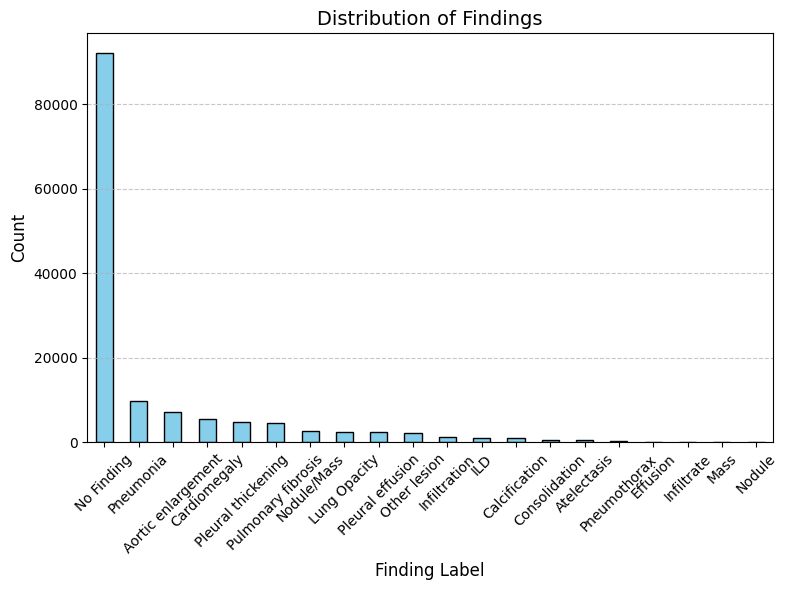

In [32]:
finding_counts = merged_df['class_name'].value_counts()

plt.figure(figsize=(8, 6))
finding_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Findings", fontsize=14)
plt.xlabel("Finding Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

In [34]:
finding_counts

,count
class_name,
No Finding,92179
Pneumonia,9675
Aortic enlargement,7162
Cardiomegaly,5573
Pleural thickening,4842
Pulmonary fibrosis,4655
Nodule/Mass,2580
Lung Opacity,2483
Pleural effusion,2476
